## AdaBoosting, Gradientboosting, XGBoosting Regressor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (9,5)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [2]:
df=pd.read_csv("car_dataset.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


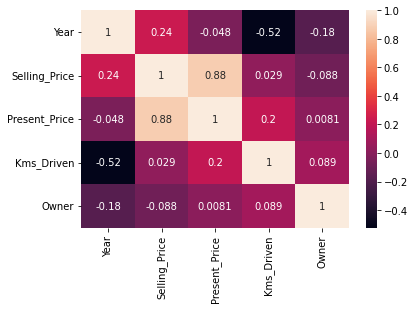

In [7]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [8]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
df["vehicle_age"]=2021-df.Year

In [10]:
df.Car_Name.value_counts()

city                         26
corolla altis                16
verna                        14
fortuner                     11
brio                         10
ciaz                          9
innova                        9
i20                           9
grand i10                     8
jazz                          7
amaze                         7
Royal Enfield Classic 350     7
ertiga                        6
eon                           6
sx4                           6
alto k10                      5
i10                           5
swift                         5
Bajaj Pulsar 150              4
Royal Enfield Thunder 350     4
ritz                          4
wagon r                       4
etios liva                    4
dzire                         4
xcent                         3
etios cross                   3
Royal Enfield Thunder 500     3
TVS Apache RTR 160            3
Yamaha FZ S V 2.0             3
creta                         3
Honda CB Hornet 160R          3
etios g 

In [11]:
df.drop(columns=["Year"], inplace=True)

In [12]:
#df=pd.get_dummies(df, drop_first=True)

In [13]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


## Train test split

In [14]:
from sklearn.preprocessing import OrdinalEncoder

In [15]:
X=df.drop("Selling_Price", axis=1)
y=df.Selling_Price

In [16]:
cat = X.select_dtypes("object").columns
cat

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [17]:
enc = OrdinalEncoder()
X[cat] = enc.fit_transform(X[cat])
X.head()

,Car_Name,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,90.0,5.59,27000,2.0,0.0,1.0,0,7
1,93.0,9.54,43000,1.0,0.0,1.0,0,8
2,68.0,9.85,6900,2.0,0.0,1.0,0,4
3,96.0,4.15,5200,2.0,0.0,1.0,0,10
4,92.0,6.87,42450,1.0,0.0,1.0,0,7


In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=5)

print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)


Train features shape :  (240, 8)
Train target shape   :  (240,)
Test features shape  :  (61, 8)
Test target shape    :  (61,)


## Modeling

In [19]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [20]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

## Adaboost Regressor

In [21]:
from sklearn.ensemble import AdaBoostRegressor

In [22]:
#base_estimator=DecisionTreeRegressor(max_depth=3)
ada_model = AdaBoostRegressor(random_state=101, n_estimators=50)

In [23]:
ada_model.fit(X_train, y_train)

AdaBoostRegressor(random_state=101)

In [24]:
train_val(ada_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.967360,0.938860
mae,0.730070,0.920171
mse,0.830186,1.641058
rmse,0.911145,1.281038


In [25]:
from sklearn.model_selection import cross_validate, cross_val_score
model = AdaBoostRegressor(random_state=101, n_estimators=50)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores)
pd.DataFrame(scores).mean()[2:]

test_r2                             0.835971
test_neg_mean_absolute_error       -1.116024
test_neg_mean_squared_error        -4.898089
test_neg_root_mean_squared_error   -1.892615
dtype: float64

In [26]:
y_pred_ada = ada_model.predict(X_test)
y_pred_ada

array([ 5.93635135,  5.93635135,  4.81666667,  5.50203704,  3.14486486,
       10.00131313,  9.61186667,  1.08078947, 15.33333333,  5.25494253,
        5.93635135,  6.62080645,  4.25894737,  5.44085714,  1.08078947,
        3.48181818,  6.02      ,  1.08078947,  6.02      ,  1.08078947,
        5.44085714, 21.74923077, 19.6584127 ,  1.12391304,  3.746875  ,
        5.31938272,  5.78793103,  6.62745098,  5.78793103,  5.31938272,
        5.25494253,  9.74408602,  5.25494253,  1.08078947,  1.08078947,
        5.78793103,  6.35779661,  5.31938272,  1.12391304,  1.56258065,
        1.08078947,  5.29588235, 15.91716667,  1.08078947,  1.12391304,
        5.50203704,  1.08078947,  6.6330303 ,  3.48181818,  5.25494253,
        4.81666667, 21.74923077,  4.25894737,  1.12391304,  1.08078947,
        1.08078947,  3.14486486,  1.08078947,  1.08078947,  1.08078947,
        1.08078947])

In [27]:
from sklearn.tree import plot_tree

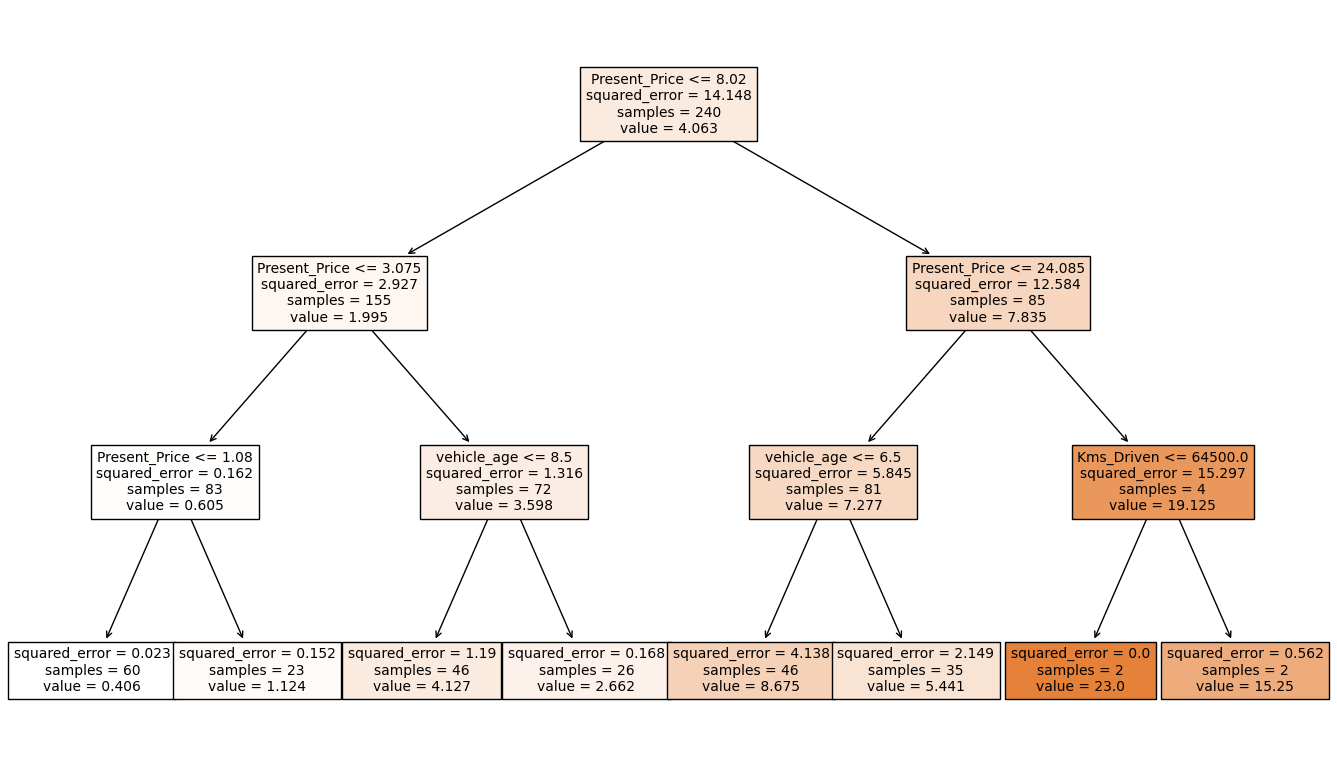

In [28]:
model = AdaBoostRegressor(random_state=101, n_estimators=3, learning_rate=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

features = list(X.columns)
plt.figure(figsize=(17,10),dpi=100)
plot_tree(model.estimators_[0], filled=True, feature_names=X.columns, fontsize=10);

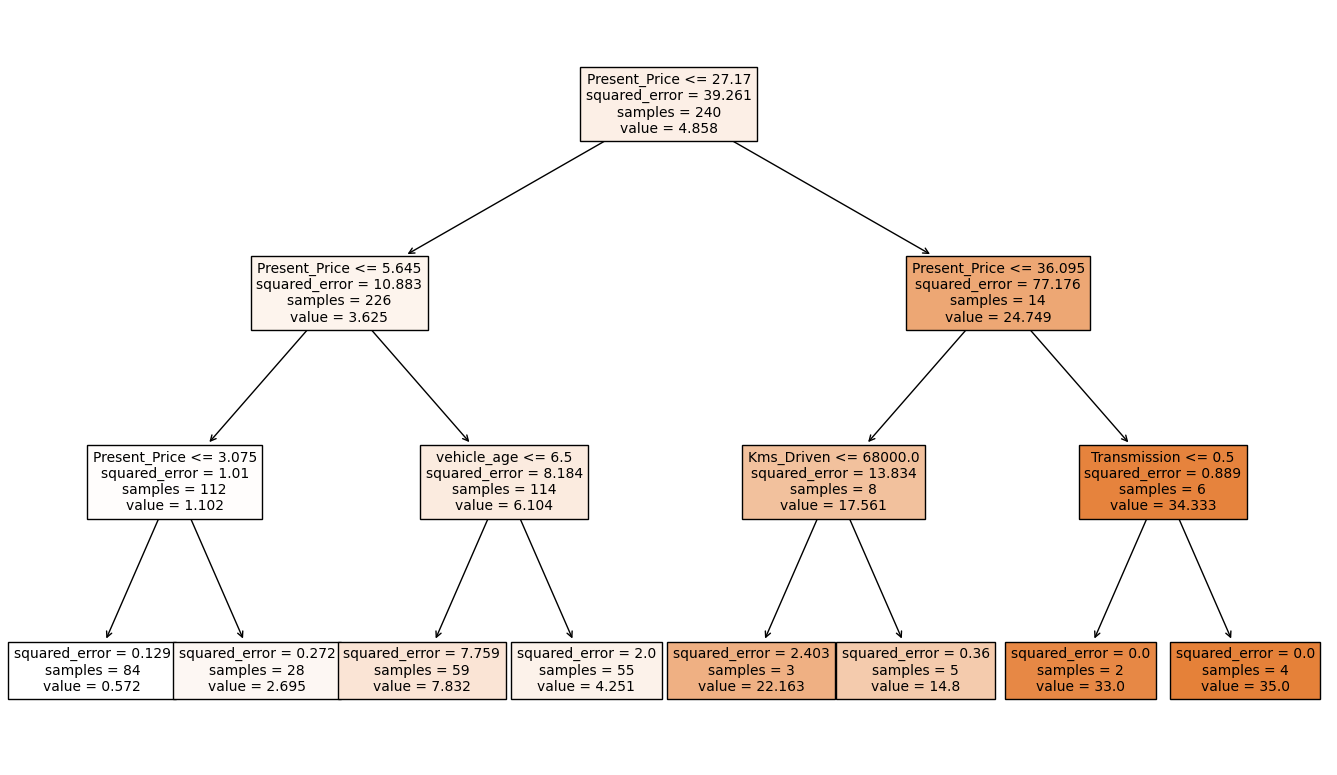

In [29]:
plt.figure(figsize=(17,10),dpi=100)
plot_tree(model.estimators_[1], filled=True, feature_names=X.columns, fontsize=10);

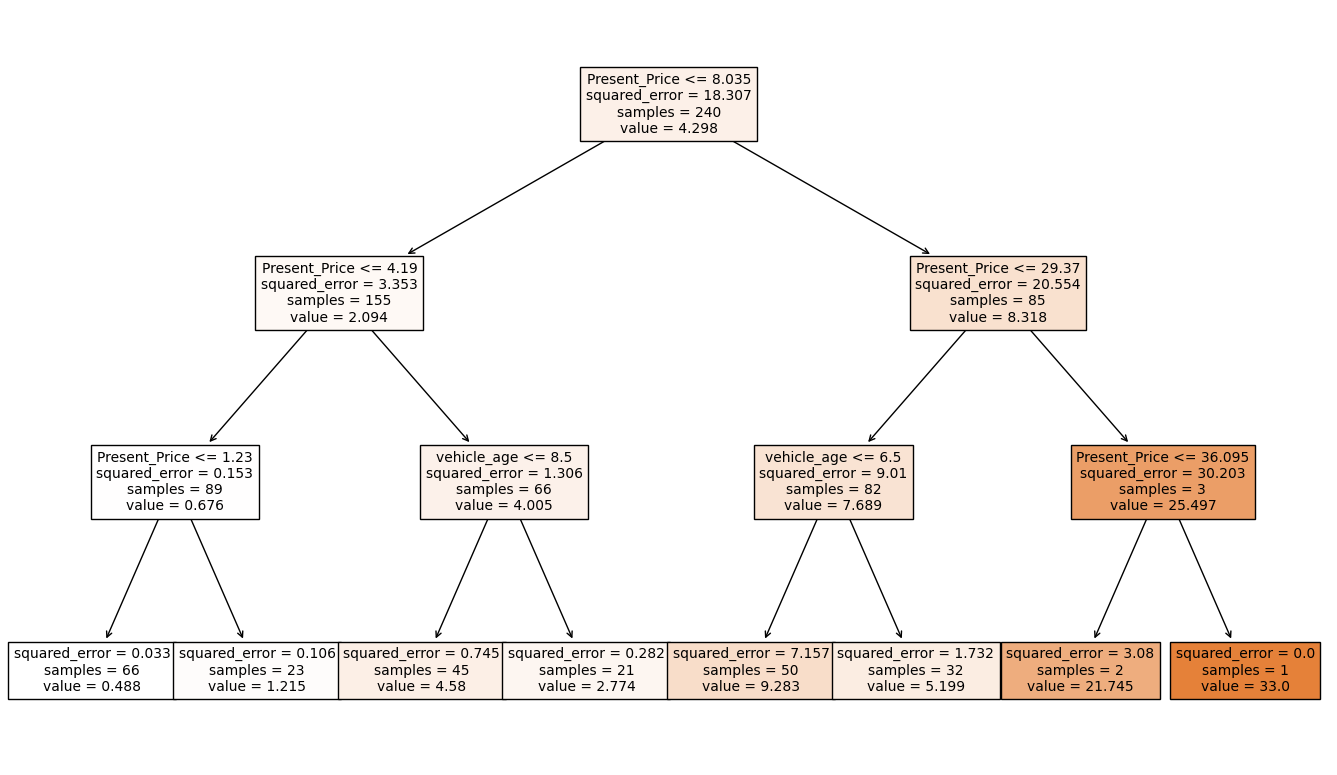

In [30]:
plt.figure(figsize=(17,10),dpi=100)
plot_tree(model.estimators_[2], filled=True, feature_names=X.columns, fontsize=10);

In [31]:
y_pred

array([ 5.19875   ,  5.19875   ,  4.25072727,  4.25072727,  4.12717391,
        5.19875   ,  5.19875   ,  0.48833333, 15.25      ,  4.58      ,
        5.19875   ,  8.67478261,  4.25072727,  5.19875   ,  0.48833333,
        4.12717391,  5.19875   ,  0.48833333,  5.19875   ,  0.48833333,
        5.19875   , 22.16333333, 15.25      ,  1.12391304,  2.77380952,
        4.58      ,  4.58      ,  8.67478261,  4.58      ,  5.19875   ,
        4.58      ,  8.67478261,  4.58      ,  0.48833333,  0.48833333,
        5.19875   ,  8.67478261,  4.58      ,  1.12391304,  2.69464286,
        0.48833333,  4.58      ,  8.67478261,  0.48833333,  1.12391304,
        4.58      ,  0.48833333,  8.67478261,  4.12717391,  5.19875   ,
        4.58      ,  9.2834    ,  2.77380952,  1.12391304,  0.48833333,
        0.48833333,  2.69464286,  0.48833333,  0.48833333,  0.48833333,
        0.48833333])

In [32]:
np.array(y_test)

array([ 9.25,  9.65,  3.65,  6.  ,  2.9 ,  8.25,  6.25,  0.6 , 14.9 ,
        5.5 ,  5.5 ,  6.5 ,  3.45,  3.49,  0.45,  3.5 ,  7.05,  0.35,
        6.95,  0.4 ,  3.8 , 23.  , 18.75,  1.  ,  1.95,  4.5 ,  4.5 ,
        9.1 ,  5.8 ,  4.35,  5.25,  9.7 ,  5.4 ,  0.2 ,  0.38,  6.15,
        7.75,  4.9 ,  1.05,  1.35,  0.75,  4.8 , 19.75,  0.17,  1.11,
        4.75,  0.2 ,  8.35,  2.9 ,  4.5 ,  5.15, 20.75,  2.25,  1.1 ,
        0.35,  0.15,  3.  ,  0.3 ,  0.2 ,  0.75,  0.45])

In [33]:
#X_test

In [34]:
X_test.loc[67]

Car_Name            81.00
Present_Price       20.45
Kms_Driven       59000.00
Fuel_Type            1.00
Seller_Type          0.00
Transmission         1.00
Owner                0.00
vehicle_age         11.00
Name: 67, dtype: float64

## Gridsearch for Adaboosting

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
param_grid = {"n_estimators":[50, 100, 200, 300, 500],
              "learning_rate":[0.1, 0.5, 0.8, 1],
              "loss": ["linear", "square"]
            }

In [37]:
model = AdaBoostRegressor(random_state=101)
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [38]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=AdaBoostRegressor(random_state=101), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 0.8, 1],
                         'loss': ['linear', 'square'],
                         'n_estimators': [50, 100, 200, 300, 500]},
             scoring='neg_root_mean_squared_error')

In [39]:
grid_model.best_params_

{'learning_rate': 1, 'loss': 'square', 'n_estimators': 300}

In [40]:
grid_model.best_score_

-1.7870767870408986

In [41]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.961240,0.939360
mae,0.830284,1.015983
mse,0.985835,1.627622
rmse,0.992892,1.275783


## Feature importance

In [42]:
model = AdaBoostRegressor(random_state=101,n_estimators=500, learning_rate=0.5)
model.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.5, n_estimators=500, random_state=101)

In [43]:
model.feature_importances_

array([0.01408638, 0.83349813, 0.03292981, 0.01693637, 0.00109642,
       0.00269668, 0.00121041, 0.0975458 ])

In [44]:
imp_feats = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['ada_Importance'])
ada_imp_feats = imp_feats.sort_values('ada_Importance')
ada_imp_feats

,ada_Importance
Seller_Type,0.001096
Owner,0.001210
Transmission,0.002697
Car_Name,0.014086
Fuel_Type,0.016936
Kms_Driven,0.032930
vehicle_age,0.097546
Present_Price,0.833498


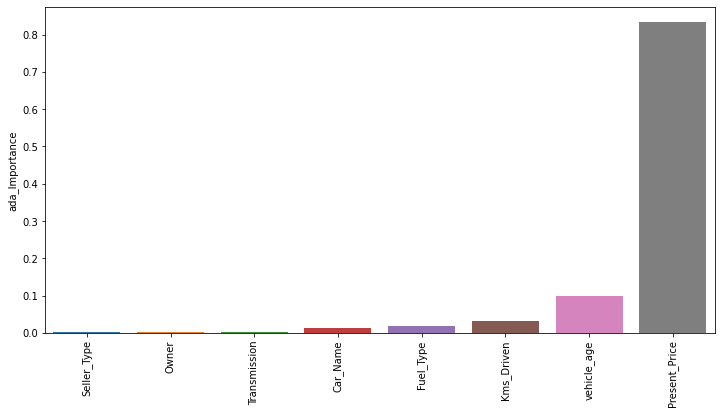

In [45]:
plt.figure(figsize=(12,6))
sns.barplot(data=ada_imp_feats, x=ada_imp_feats.index, y='ada_Importance')

plt.xticks(rotation=90);

## Gradient Boosting Regressor

In [46]:
from sklearn.ensemble import GradientBoostingRegressor

In [47]:
grad_model = GradientBoostingRegressor(random_state=101)

In [48]:
# 100 -- 150 -- (-50) -- (-30) --> 150 + 0.1 * (-50) + 0.1*(-30)

# 200 -- 150 -- (50) -- (25)  --> 150 + 0.1 * 50 + 0.1*25

In [49]:
grad_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=101)

In [50]:
train_val(grad_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.996501,0.970278
mae,0.217741,0.533569
mse,0.088991,0.797770
rmse,0.298314,0.893180


In [51]:
model = GradientBoostingRegressor(random_state=101)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores)
pd.DataFrame(scores).mean()[2:]

test_r2                             0.890442
test_neg_mean_absolute_error       -0.751150
test_neg_mean_squared_error        -3.348033
test_neg_root_mean_squared_error   -1.552812
dtype: float64

## Gridsearch for Gradientboosting

In [52]:
param_grid = {"n_estimators":[100, 200, 300], "subsample":[0.8, 1], "max_features" : [None, 2, 3, 4],
            "learning_rate": [0.001, 0.01, 0.1, 0.5], 'max_depth':[2,3]}

In [53]:
model = GradientBoostingRegressor(random_state=101)
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [54]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(random_state=101),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.5],
                         'max_depth': [2, 3], 'max_features': [None, 2, 3, 4],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1]},
             scoring='neg_root_mean_squared_error')

In [55]:
grid_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 2,
 'max_features': 4,
 'n_estimators': 300,
 'subsample': 0.8}

In [56]:
grid_model.best_score_

-1.3604843443220447

In [57]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.996280,0.95419
mae,0.228673,0.58534
mse,0.094620,1.22957
rmse,0.307604,1.10886


In [58]:
model = GradientBoostingRegressor(random_state=101, max_depth=2, max_features=4, n_estimators=300, subsample=0.8)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores).mean()[2:]

test_r2                             0.911073
test_neg_mean_absolute_error       -0.720990
test_neg_mean_squared_error        -2.572960
test_neg_root_mean_squared_error   -1.360484
dtype: float64

## Feature importance

In [59]:
model = GradientBoostingRegressor(random_state=101, max_depth=2, max_features=4, n_estimators=300, subsample=0.8)
model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, max_features=4, n_estimators=300,
                          random_state=101, subsample=0.8)

In [60]:
model.feature_importances_

array([9.12937722e-02, 7.35751195e-01, 3.21390246e-02, 5.25140122e-02,
       1.35299779e-02, 2.01178997e-02, 2.58794909e-04, 5.43953234e-02])

In [61]:
imp_feats = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['grad_Importance'])
grad_imp_feats = imp_feats.sort_values('grad_Importance')
grad_imp_feats

,grad_Importance
Owner,0.000259
Seller_Type,0.013530
Transmission,0.020118
Kms_Driven,0.032139
Fuel_Type,0.052514
vehicle_age,0.054395
Car_Name,0.091294
Present_Price,0.735751


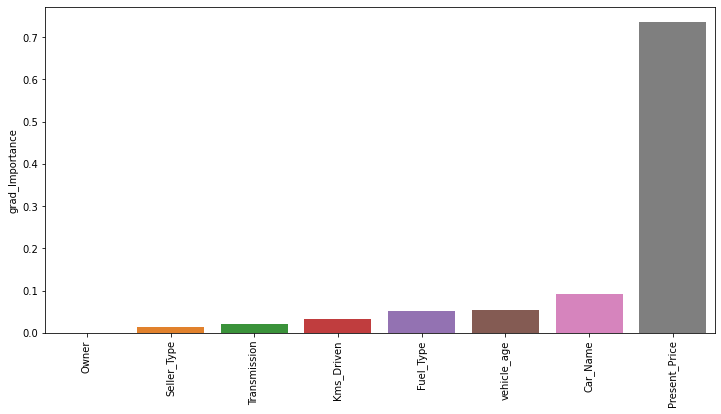

In [62]:
plt.figure(figsize=(12,6))
sns.barplot(data=grad_imp_feats, x=grad_imp_feats.index, y='grad_Importance')

plt.xticks(rotation=90);

## XG Boost Regressor

In [63]:
#!pip install --upgrade pip

In [64]:
#!pip install xgboost

In [65]:
from xgboost import XGBRegressor

In [66]:
xgb_model = XGBRegressor(random_state=101, objective="reg:squarederror")

In [67]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=101,
             reg_alpha=0, reg_lambda=1, ...)

In [68]:
train_val(xgb_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.999999,0.971793
mae,0.004302,0.503537
mse,0.000035,0.757107
rmse,0.005933,0.870119


In [69]:
model = XGBRegressor(random_state=101, objective="reg:squarederror")
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                             0.900763
test_neg_mean_absolute_error       -0.732499
test_neg_mean_squared_error        -2.789084
test_neg_root_mean_squared_error   -1.435410
dtype: float64

## Gridsearch for XGBoost

In [70]:
param_grid = {"n_estimators":[100, 300,500],'max_depth':[3,5,6,7], "learning_rate": [0.05, 0.1, 0.2],
             "subsample":[0.5, 1], "colsample_bytree":[0.5, 1]}

In [71]:
model = XGBRegressor(random_state=101, objective="reg:squarederror")
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [72]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_ca...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=101,
                                    reg_alpha=None, reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 1],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 6, 7],
                         'n_estimators': [100, 300, 500],
                         'subsample': [0.5, 1]},
             scoring='neg_root_mean_squared_error')

In [73]:
grid_model.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.2,
 'max_depth': 6,
 'n_estimators': 100,
 'subsample': 0.5}

In [74]:
grid_model.best_score_

-1.1771591478016128

In [75]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.999791,0.973263
mae,0.054037,0.507799
mse,0.005328,0.717641
rmse,0.072994,0.847137


## Feature importance

In [76]:
model = XGBRegressor(random_state=101, objective="reg:squarederror",learning_rate=0.2, max_dept=6, subsample=0.5)
model.fit(X_train, y_train)

[11:05:34] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_dept" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_dept=6, max_depth=6, max_leaves=0,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
             random_state=101, reg_alpha=0, ...)

In [77]:
model.feature_importances_

array([0.05246875, 0.7590703 , 0.01698945, 0.03854104, 0.00300673,
       0.0086121 , 0.00297573, 0.1183359 ], dtype=float32)

In [78]:
imp_feats = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['xgb_Importance'])
xgb_imp_feats = imp_feats.sort_values('xgb_Importance')
xgb_imp_feats

,xgb_Importance
Owner,0.002976
Seller_Type,0.003007
Transmission,0.008612
Kms_Driven,0.016989
Fuel_Type,0.038541
Car_Name,0.052469
vehicle_age,0.118336
Present_Price,0.759070


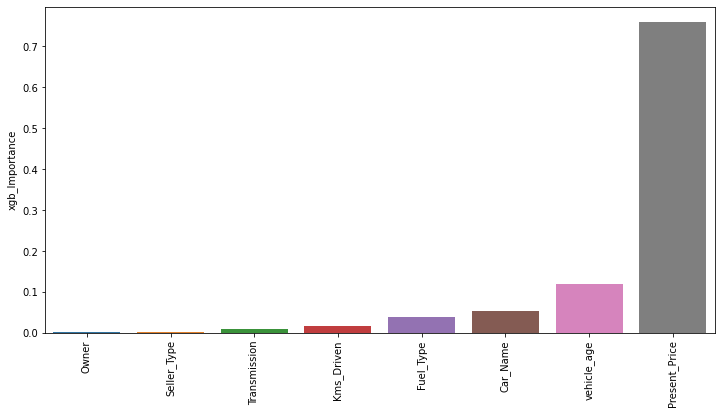

In [79]:
plt.figure(figsize=(12,6))
sns.barplot(data=xgb_imp_feats, x=xgb_imp_feats.index, y='xgb_Importance')

plt.xticks(rotation=90);

## Feature importance comparison

In [80]:
pd.concat([ada_imp_feats, grad_imp_feats, xgb_imp_feats], axis=1)

,ada_Importance,grad_Importance,xgb_Importance
Seller_Type,0.001096,0.013530,0.003007
Owner,0.001210,0.000259,0.002976
Transmission,0.002697,0.020118,0.008612
Car_Name,0.014086,0.091294,0.052469
Fuel_Type,0.016936,0.052514,0.038541
Kms_Driven,0.032930,0.032139,0.016989
vehicle_age,0.097546,0.054395,0.118336
Present_Price,0.833498,0.735751,0.759070


## New model

In [81]:
X_new = df[["vehicle_age",  "Present_Price"]]

In [82]:
X_new.head()

,vehicle_age,Present_Price
0,7,5.59
1,8,9.54
2,4,9.85
3,10,4.15
4,7,6.87


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.1, random_state=5)

In [84]:
model = XGBRegressor(random_state=101, objective="reg:squarederror")

In [85]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=101,
             reg_alpha=0, reg_lambda=1, ...)

In [86]:
train_val(model, X_train, y_train, X_test, y_test)

,train,test
R2,0.996596,0.969234
mae,0.115190,0.631831
mse,0.087038,0.777716
rmse,0.295022,0.881882


In [87]:
model = XGBRegressor(random_state=101, objective="reg:squarederror")
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                             0.857066
test_neg_mean_absolute_error       -0.721512
test_neg_mean_squared_error        -2.696537
test_neg_root_mean_squared_error   -1.403179
dtype: float64

## Gridsearch for new XGBoost model

In [88]:
param_grid = {"n_estimators":[100, 300,500],'max_depth':[3,5,6,7], "learning_rate": [0.05, 0.1, 0.2],
             "subsample":[0.5, 1], "colsample_bytree":[0.5, 1]}

In [89]:
model = XGBRegressor(random_state=101, objective="reg:squarederror")
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [90]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_ca...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=101,
                                    reg_alpha=None, reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 1],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 6, 7],
                         'n_estimators': [100, 300, 500],
                         'subsample': [0.5, 1]},
             scoring='neg_root_mean_squared_error')

In [91]:
grid_model.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.2,
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 0.5}

In [92]:
grid_model.best_score_

-1.1933254342552015

In [93]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.992991,0.960710
mae,0.284564,0.661908
mse,0.179196,0.993194
rmse,0.423315,0.996591
